In [1]:
import numpy as np

import time
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
from IPython.display import Markdown, display,HTML,Image
from z3 import *

### Puzzle as published 
https://www.janestreet.com/puzzles/sum-of-squares-index/

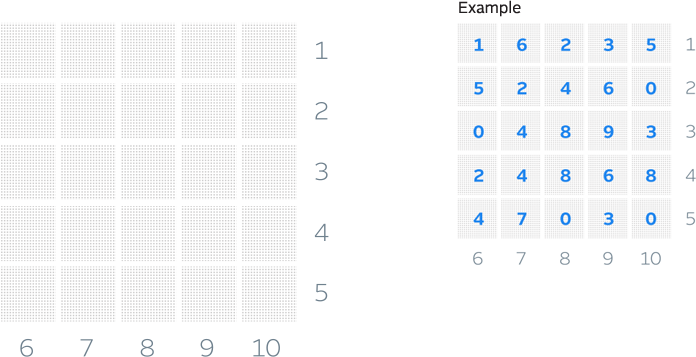

In [2]:
# Back to the first problem. Redoing with Z3
url='https://www.janestreet.com/puzzles/sum-of-squares-index/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
display(Markdown('### Puzzle as published \n'+url))
display(Image('https://www.janestreet.com/puzzles/niedermaier1.png',width=300))
HTML(str(soup.find_all('div', {'class' :'inner-wrapper'})[1]))

**Solved in 0.7989 seconds. Answer is : 205**

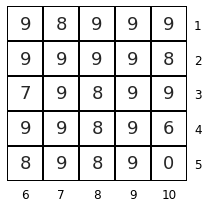

205 , 9899999998798999989689890


In [7]:
start = time.time()

# Setup # 5x5 matrix of integer variables and solver 
X = np.array(IntVector("x",25),dtype=object).reshape((5,5))
s = Optimize()

#maximise sum
s.maximize(Sum([x for _,x in np.ndenumerate(X)]))

# each cell contains a value in {0, ..., 9}
s += [And(x>=0,x<=9) for _,x in np.ndenumerate(X)]

#function to turn row/col to a number
mult = lambda x:Sum([x[i] *10**((4)-i)  for i in range(5)]) 
# Rows
s += [mult(X[i,:]) % (i+1)==0 for i in range(5)] 
# Cols
s += [mult(X[:,i]) % (i+6)==0 for i in range(5)] 

# Solve and print 
if s.check() == sat:
    m = s.model()
    evalu = np.vectorize(lambda x:m.evaluate(x).as_long())
    r = evalu(X)
else:
    print("Failed")
    
display(Markdown("**Solved in {:.4f} seconds. Answer is : {}**".format(time.time()-start,np.sum(r))))
fig,ax = plt.subplots(1,1,figsize=(3,3))
ax = sns.heatmap(np.zeros_like(r),annot=r,cbar=False,cmap="Greys",linecolor='k',linewidth=2,
                 xticklabels=[6,7,8,9,10], yticklabels=[1,2,3,4,5], annot_kws={"fontsize":18})
ax.tick_params(left=False, bottom=False,labelleft=False, labelright=True)
plt.xticks(rotation=0,fontsize =12)
plt.yticks(rotation=0,fontsize =12)
plt.tight_layout()
plt.show()

print(np.sum(r),",","".join([str(x) for _,x in np.ndenumerate(r)]))

### Solution as published 
https://www.janestreet.com/puzzles/sum-of-squares-solution/

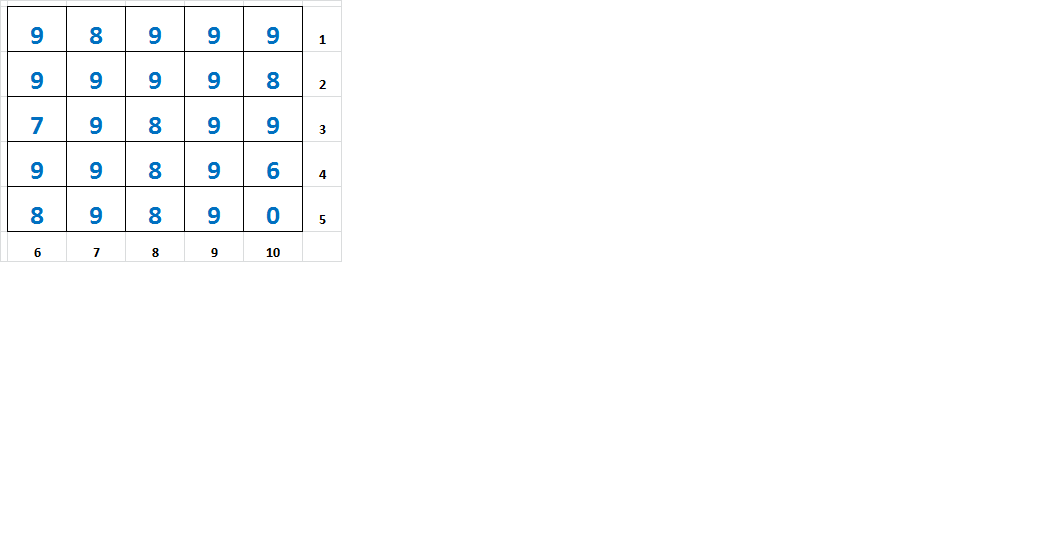

In [4]:
url='https://www.janestreet.com/puzzles/sum-of-squares-solution/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
display(Markdown('### Solution as published \n'+url))
display(Image('https://www.janestreet.com/puzzles/Jan14_Solution.png',width=500))
HTML(str(soup.find_all('div', {'class' :'inner-wrapper'})[1]))